# Подсчёт pi с использованием метода Монте-Карло

- square area: $s = (2 r)^2$
- circle area: $c = \pi r^2$
- $c/s = (\pi r^2) / (4 r^2) = \pi / 4$
- $\pi = 4 * c/s$

![Darts](https://raw.githubusercontent.com/coderefinery/jupyter/main/example/darts.svg)

In [5]:
# Импорт необходимых модулей
import random
import matplotlib.pyplot as plt

In [6]:
# Инициализация количества "бросков"
num_points = 1000

In [9]:
# Здесь мы "бросаем дротики" и подсчитываем количество попаданий
points = []
hits = 0
for _ in range(num_points):
    x, y = random.random(), random.random()
    if x*x + y*y < 1.0:
        hits += 1
        points.append((x, y, "red"))
    else:
        points.append((x, y, "blue"))

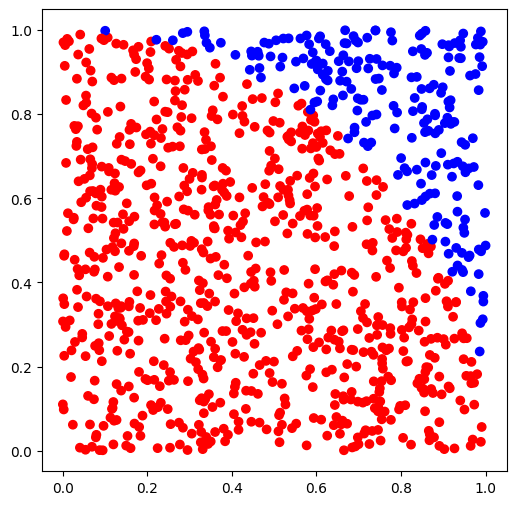

In [12]:
# Распакуем точки в 3 списка
x, y, colors = zip(*points)
# Определяем размеры фигуры
fig, ax = plt.subplots() 
fig.set_size_inches(6.0, 6.0)
# Рисуем результат
ax.scatter(x, y, c=colors)

In [13]:
# Считаем оценку
fraction = hits / num_points
4 * fraction

3.136

In [15]:
import random
from ipywidgets import interact, widgets
%matplotlib inline
from matplotlib import pyplot
def throw_darts(num_points):
    points = []
    hits = 0
    for _ in range(num_points):
        x, y = random.random(), random.random()
        if x*x + y*y < 1.0:
            hits += 1
            points.append((x, y, True))
        else:
            points.append((x, y, False))
    fraction = hits / num_points
    pi = 4 * fraction
    return pi, points
def create_plot(points):
    x, y, colors = zip(*points)
    pyplot.scatter(x, y, c=colors)
def experiment(num_points):
    pi, points = throw_darts(num_points)
    create_plot(points)
    print("approximation:", pi)

In [16]:
interact(experiment, num_points=widgets.IntSlider(min=100, max=10000, step=100, value=1000))

interactive(children=(IntSlider(value=1000, description='num_points', max=10000, min=100, step=100), Output())…

<function __main__.experiment(num_points)>

In [17]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
def gaussian(x, a, b, c):
    return a * np.exp(-b * (x-c)**2)
def noisy_gaussian():
    # gaussian array y in interval -5 <= x <= 5
    nx = 100
    x = np.linspace(-5.0, 5.0, nx)
    y = gaussian(x, a=2.0, b=0.5, c=1.5)
    noise = np.random.normal(0.0, 0.2, nx)
    y += noise
    return x, y
def fit(x, y, n):
    pfit = np.polyfit(x, y, n)
    yfit = np.polyval(pfit, x)
    return yfit
def plot(x, y, yfit):
    plt.plot(x, y, "r", label="Data")
    plt.plot(x, yfit, "b", label="Fit")
    plt.legend()
    plt.ylim(-0.5, 2.5)
    plt.show()
    x, y = noisy_gaussian()
    yfit = fit(x, y, n=5) # fit a 5th order polynomial to it
    plot(x, y, yfit)

In [31]:
import numpy as np
from ipywidgets import interact
import matplotlib.pyplot as plt
%matplotlib inline
def gaussian(x, a, b, c):
    return a * np.exp(-b * (x-c)**2)
def noisy_gaussian():
    # gaussian array y in interval -5 <= x <= 5
    nx = 100
    x = np.linspace(-5.0, 5.0, nx)
    y = gaussian(x, a=2.0, b=0.5, c=1.5)
    noise = np.random.normal(0.0, 0.2, nx)
    y += noise
    return x, y
def fit(x, y, n):
    pfit = np.polyfit(x, y, n)
    yfit = np.polyval(pfit, x)
    return yfit
def plot(x, y, yfit):
    plt.plot(x, y, "r", label="Data")
    plt.plot(x, yfit, "b", label="Fit")
    plt.legend()
    plt.ylim(-0.5, 2.5)
    plt.show()
x, y = noisy_gaussian()
@interact
def slider(n=(3, 30)):
    yfit = fit(x, y, n)
    plot(x, y, yfit)

interactive(children=(IntSlider(value=16, description='n', max=30, min=3), Output()), _dom_classes=('widget-in…

In [ ]:
import numpy as np

In [ ]:
def step():
    import random
    return 1. if random.random() > .5 else -1.

In [ ]:
def walk(n):
    x = np.zeros(n)
    dx = 1. / n
    for i in range(n - 1):
        x_new = x[i] + dx * step()
        if x_new > 5e-3:
            x[i + 1] = 0.        
        else:
            x[i + 1] = x_new
    return x

In [ ]:
n = 100000
x = walk(n)

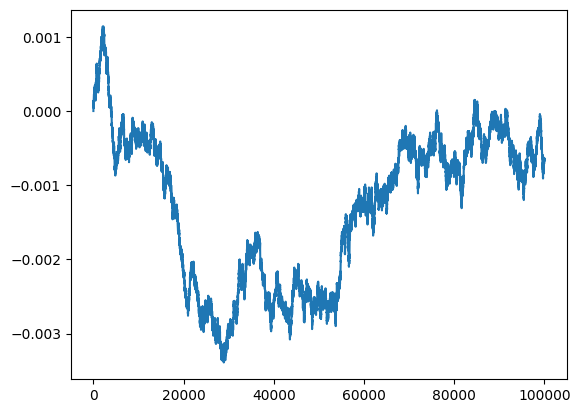

In [21]:
import matplotlib.pyplot as plt
plt.plot(x);

In [22]:
t1 = %timeit -o walk(n)

89.2 ms ± 4.4 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [23]:
t1.best

0.08400121000013314

In [24]:
%%prun
walk(n)

         200003 function calls in 0.165 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.100    0.100    0.165    0.165 310291878.py:6(walk)
    99999    0.055    0.000    0.065    0.000 310291878.py:3(step)
    99999    0.010    0.000    0.010    0.000 {method 'random' of '_random.Random' objects}
        1    0.000    0.000    0.000    0.000 {built-in method numpy.zeros}
        1    0.000    0.000    0.165    0.165 {built-in method builtins.exec}
        1    0.000    0.000    0.165    0.165 <string>:1(<module>)
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}

In [26]:
!pip install line_profiler

  Obtaining dependency information for line_profiler from https://files.pythonhosted.org/packages/0c/65/2bbbd5d9730ad709fbb8323b25830bb26dfd9b2e73a77ce81e560becece6/line_profiler-4.1.1-cp310-cp310-win_amd64.whl.metadata
   ---------------------------------------- 0.0/118.5 kB ? eta -:--:--
   ---------- ----------------------------- 30.7/118.5 kB ? eta -:--:--
   ---------- ----------------------------- 30.7/118.5 kB ? eta -:--:--
   ---------- ----------------------------- 30.7/118.5 kB ? eta -:--:--
   ---------- ----------------------------- 30.7/118.5 kB ? eta -:--:--
   ---------- ----------------------------- 30.7/118.5 kB ? eta -:--:--
   ---------- ----------------------------- 30.7/118.5 kB ? eta -:--:--
   ---------- ----------------------------- 30.7/118.5 kB ? eta -:--:--
   ---------- ----------------------------- 30.7/118.5 kB ? eta -:--:--
   -------------------------------------- 118.5/118.5 kB 265.9 kB/s eta 0:00:00


In [27]:
%load_ext line_profiler

In [28]:
%lprun?

Docstring:
Execute a statement under the line-by-line profiler from the
line_profiler module.

Usage:

    %lprun -f func1 -f func2 <statement>

The given statement (which doesn't require quote marks) is run via the
LineProfiler. Profiling is enabled for the functions specified by the -f
options. The statistics will be shown side-by-side with the code through the
pager once the statement has completed.

Options:

-f <function>: LineProfiler only profiles functions and methods it is told
to profile.  This option tells the profiler about these functions. Multiple
-f options may be used. The argument may be any expression that gives
a Python function or method object. However, one must be careful to avoid
spaces that may confuse the option parser.

-m <module>: Get all the functions/methods in a module

One or more -f or -m options are required to get any useful results.

-D <filename>: dump the raw statistics out to a pickle file on disk. The
usual extension for this is ".lprof". These s

In [29]:
%lprun -f walk walk(10000)

Timer unit: 1e-07 s

Total time: 0.0616846 s
File: D:\Temp\ipykernel_25052\310291878.py
Function: walk at line 6

Line #      Hits         Time  Per Hit   % Time  Line Contents
     6                                           def walk(n):
     7         1        543.0    543.0      0.1      x = np.zeros(n)
     8         1         15.0     15.0      0.0      dx = 1. / n
     9     10000      60077.0      6.0      9.7      for i in range(n - 1):
    10      9999     382990.0     38.3     62.1          x_new = x[i] + dx * step()
    11      9999      72855.0      7.3     11.8          if x_new > 5e-3:
    12         1         18.0     18.0      0.0              x[i + 1] = 0.
    13                                                   else:
    14      9998     100343.0     10.0     16.3              x[i + 1] = x_new
    15         1          5.0      5.0      0.0      return x

In [30]:
%lprun -f step walk(10000)

Timer unit: 1e-07 s

Total time: 0.0201253 s
File: D:\Temp\ipykernel_25052\310291878.py
Function: step at line 3

Line #      Hits         Time  Per Hit   % Time  Line Contents
     3                                           def step():
     4      9999      94213.0      9.4     46.8      import random
     5      9999     107040.0     10.7     53.2      return 1. if random.random() > .5 else -1.